In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# importing the image
image = plt.imread('lena.png')

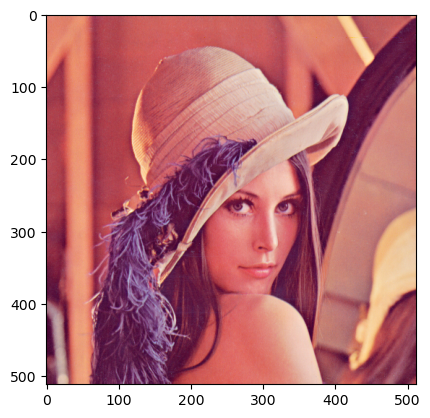

In [4]:
# displaying the image
plt.imshow(image)
plt.show()

In [5]:
# converting the image to grayscale
import cv2
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

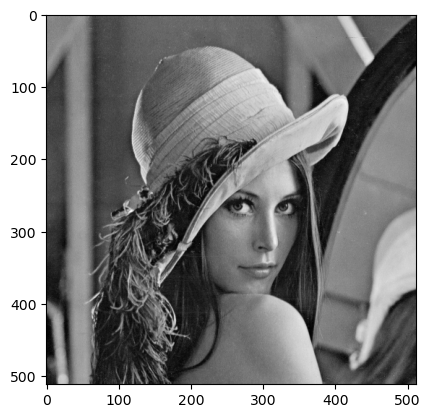

In [6]:
# displaying the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.show()

In [7]:
# writing a user defined function to perform bilinear interpolation given the scale factor
def bilinear_interpolation(image, scale_factor):
    # getting the dimensions of the image
    row, col = image.shape
    # creating a new image with the new dimensions
    new_image = np.zeros((int(row*scale_factor), int(col*scale_factor)))
    # looping through the new image
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            # getting the corresponding pixel values from the original image
            x = i/scale_factor
            y = j/scale_factor
            # getting the pixel values
            p = int(x)
            q = int(y)
            a = x-p
            b = y-q
            # performing the bilinear interpolation
            if p < row-1 and q < col-1:
                new_image[i, j] = (1-a)*(1-b)*image[p, q] + a*(1-b)*image[p+1, q] + (1-a)*b*image[p, q+1] + a*b*image[p+1, q+1]
            elif p == row-1 and q < col-1:
                new_image[i, j] = (1-a)*image[p, q] + a*image[p, q+1]
            elif p < row-1 and q == col-1:
                new_image[i, j] = (1-b)*image[p, q] + b*image[p+1, q]
            else:
                new_image[i, j] = image[p, q]
    return new_image

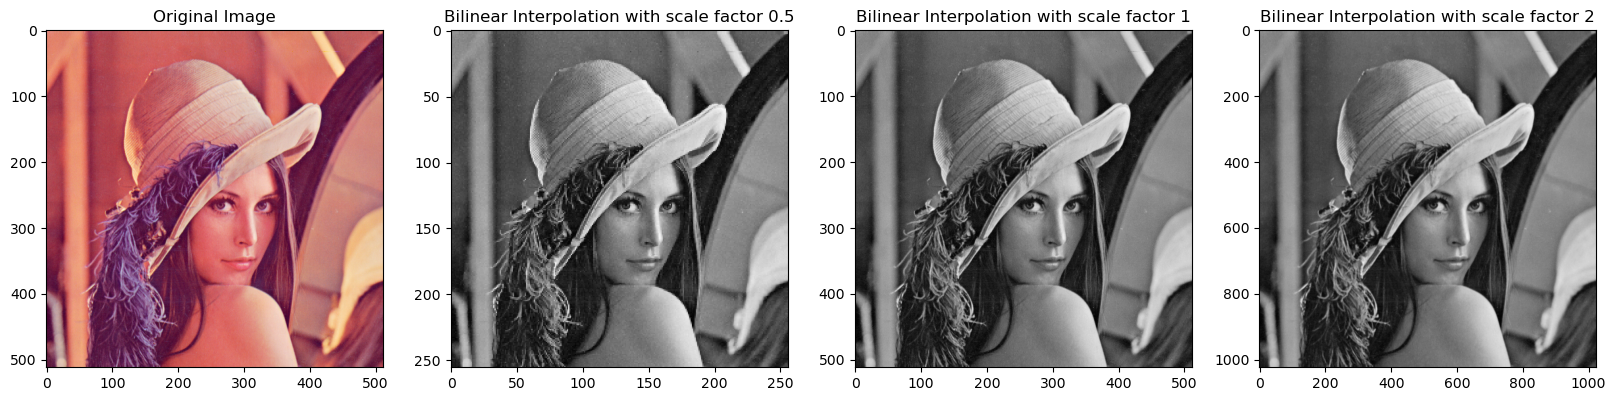

In [30]:
# performing bilinear interpolation on the grayscale image with scale size 0.5,1,2 and showing them side by side
# performing bilinear interpolation on the grayscale image with scale size 0.5,1,2 and showing them side by side
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(bilinear_interpolation(gray_image, 0.5), cmap='gray')
ax[1].set_title('Bilinear Interpolation with scale factor 0.5')
ax[2].imshow(bilinear_interpolation(gray_image, 1), cmap='gray')
ax[2].set_title('Bilinear Interpolation with scale factor 1')
ax[3].imshow(bilinear_interpolation(gray_image, 2), cmap='gray')
ax[3].set_title('Bilinear Interpolation with scale factor 2')
plt.show()

In [9]:
# displaying the images in a new window
cv2.imshow('Original Image', image)
cv2.imshow('Bilinear Interpolation with scale factor 0.5', bilinear_interpolation(gray_image, 0.5))
cv2.imshow('Bilinear Interpolation with scale factor 1', bilinear_interpolation(gray_image, 1))
cv2.imshow('Bilinear Interpolation with scale factor 2', bilinear_interpolation(gray_image, 2))
cv2.waitKey(0)
cv2.destroyAllWindows()

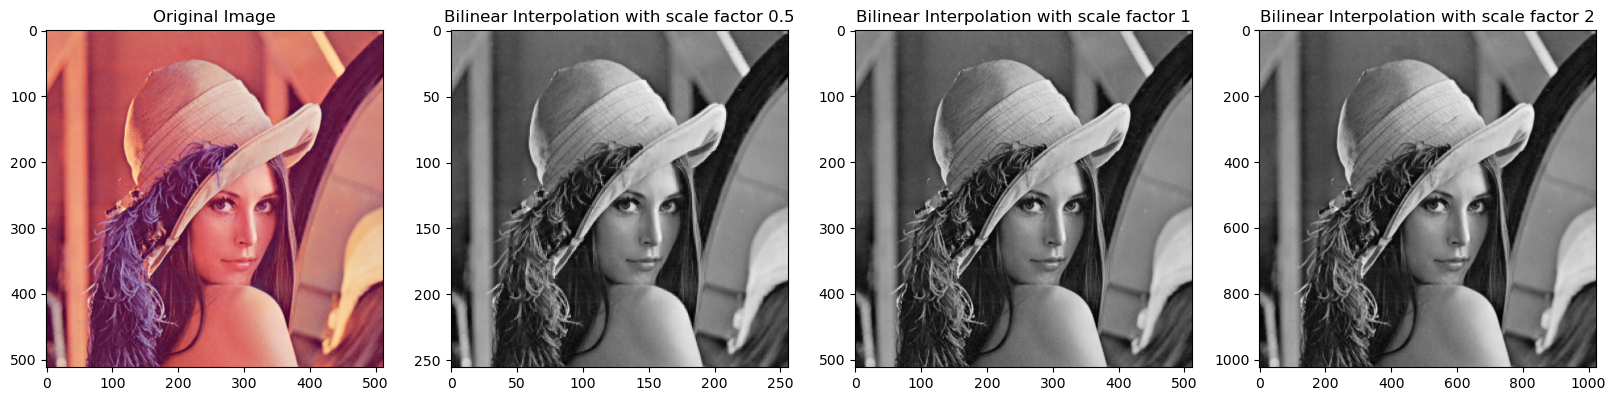

In [8]:
# performing bilinear interpolation using opencv and showing the images side by side
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(cv2.resize(gray_image, (int(gray_image.shape[1]*0.5), int(gray_image.shape[0]*0.5)), interpolation=cv2.INTER_LINEAR), cmap='gray')
ax[1].set_title('Bilinear Interpolation with scale factor 0.5')
ax[2].imshow(cv2.resize(gray_image, (int(gray_image.shape[1]*1), int(gray_image.shape[0]*1)), interpolation=cv2.INTER_LINEAR), cmap='gray')
ax[2].set_title('Bilinear Interpolation with scale factor 1')
ax[3].imshow(cv2.resize(gray_image, (int(gray_image.shape[1]*2), int(gray_image.shape[0]*2)), interpolation=cv2.INTER_LINEAR), cmap='gray')
ax[3].set_title('Bilinear Interpolation with scale factor 2')
plt.show()

In [ ]:
# displaying the images in a new window
cv2.imshow('Original Image', image)
cv2.imshow('Bilinear Interpolation with scale factor 0.5', cv2.resize(gray_image, (int(gray_image.shape[1]*0.5), int(gray_image.shape[0]*0.5)), interpolation=cv2.INTER_LINEAR))
cv2.imshow('Bilinear Interpolation with scale factor 1', cv2.resize(gray_image, (int(gray_image.shape[1]*1), int(gray_image.shape[0]*1)), interpolation=cv2.INTER_LINEAR))
cv2.imshow('Bilinear Interpolation with scale factor 2', cv2.resize(gray_image, (int(gray_image.shape[1]*2), int(gray_image.shape[0]*2)), interpolation=cv2.INTER_LINEAR))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### The Images Produced by the User-Defined and Inbuilt Functions look to be the same